In [180]:
import numpy as np
import math as math
import matplotlib.pyplot as plt
import tensorflow as tf

In [247]:
def generateData(n1, n2):
    theta = np.random.uniform(0, 2*math.pi, n1 + n2)
    r = np.hstack((np.random.normal(0,0.2,n1),np.random.normal(0.7,0.2,n2)))
    temrcos = []
    temrsin = []
    for i in range(n1 + n2):
        temrcos.append(r[i]*math.cos(theta[i]))
        temrsin.append(r[i]*math.sin(theta[i]))
    y = np.hstack((np.repeat([0],n1),np.repeat([1],n2)))
    return({"x1":temrcos,"x2":temrsin,"y":y})

In [248]:
data = generateData(30,200)

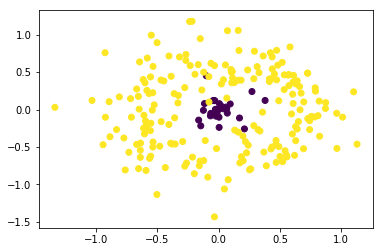

In [249]:
plt.scatter(data["x1"], data["x2"], c=data["y"])
plt.show()

In [250]:
data_x1 = np.float32(data["x1"])[:, np.newaxis]
data_x2 = np.float32(data["x2"])[:, np.newaxis]
data_y = np.float32(data["y"])[:, np.newaxis]
data_test = np.hstack((data_x1, data_x2))
data_test_y = np.ndarray([len(data_y),2])
for i in range(len(data_y)):
    if data_y[i] == 0:
        data_test_y[i,] = [1,0]
    else:
        data_test_y[i,] = [0,1]


In [251]:
def add_layer(inputs, in_size, out_size, activation_function=None,):
    # add one more layer and return the output of this layer
    Weights = tf.Variable(tf.random_normal([in_size, out_size]))
    biases = tf.Variable(tf.zeros([1, out_size]) + 0.1,)
    Wx_plus_b = tf.matmul(inputs, Weights) + biases
    if activation_function is None:
        outputs = Wx_plus_b
    else:
        outputs = activation_function(Wx_plus_b,)
    return outputs

In [252]:
xs = tf.placeholder(tf.float32, [None, 2])
ys = tf.placeholder(tf.float32, [None, 2])


In [253]:
l1 = add_layer(xs, 2, 10,  activation_function=tf.nn.relu)
prediction = add_layer(l1, 10, 2,  activation_function=tf.nn.softmax)
cross_entropy = tf.reduce_mean(-tf.reduce_sum(ys * tf.log(prediction),
                                              reduction_indices=[1]))       # loss


train_step = tf.train.GradientDescentOptimizer(0.5).minimize(cross_entropy)
sess = tf.Session()

In [254]:
init = tf.global_variables_initializer()
sess.run(init)

for i in range(1000):
    
    sess.run(train_step, feed_dict={xs: data_test, ys:data_test_y})
    if i % 50 == 0:
        print(i,sess.run(cross_entropy, feed_dict={xs: data_test, ys:data_test_y}))

0 0.396167
50 0.177548
100 0.134803
150 0.108141
200 0.0931705
250 0.0848183
300 0.0798395
350 0.0766025


400 0.0743523
450 0.0726534
500 0.0712972
550 0.0702264
600 0.0692372
650 0.068474
700 0.0678285
750 0.0673262


800 0.0668652
850 0.0664628
900 0.0661153
950 0.0657975


In [255]:
v = sess.run(prediction,feed_dict = {xs : data_test})
print(v[range(5),])

[[ 0.49470627  0.50529373]
 [ 0.97624797  0.02375197]
 [ 0.8887887   0.11121137]
 [ 0.97509617  0.02490389]
 [ 0.96734959  0.03265044]]


In [256]:
x1 = np.linspace(-1.5,1.5,31,np.float32)
x2 = np.linspace(-1.5,1.5,31,np.float32)
grid = np.ndarray([len(x1)*len(x2),2])
k = 0
for i in range(len(x2)):
    for j in range(len(x1)):
        grid[k,] = [x1[j], x2[i]]
        k = k + 1

In [257]:
prediction_grid = sess.run(prediction,feed_dict = {xs : grid})
prediction_grid_matrix = prediction_grid[range(np.shape(grid)[0]),0].reshape((31,31))


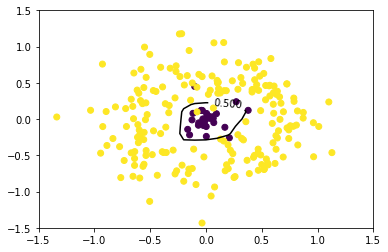

In [258]:
plt.scatter(data["x1"], data["x2"], c=data["y"])
c = plt.contour(X1,
                X2,
                prediction_grid_matrix,
                colors="black",
                levels = [0.5])
plt.clabel(c, inline = True)
plt.show()

In [262]:
data_test_y

TypeError: weighted_cross_entropy_with_logits() missing 2 required positional arguments: 'targets' and 'logits'